# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

< Ashutosh >
The used car market heavily depends on multiple factors like make and model of cars. What models are efficient even after aging? The good feedback on what factor impacts more is driven by the pricing of the car. The goal of this exercise is to identify the key factors that drive the price of vehicle.

- This directly impacts the price of the Car , i.e. more features higher the price.

- Right pricing the car will help with inventory rotation. If cars sit in the lot for too long it depreciate in price.

- Having proper feedback on pricing helps the dealer with more negotiation power without losing the client.

Given these drivers for used cars determine which one's influence the price significantly. Better understanding of these drivers will help with better business planning and pricing, which will help with a boost in sales and higher customer satisfaction.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

- Once the data is read go over the columns and sample data set.
- Identify the problems and sanatize the data for usage.
- Check the data composition for categorical and numercial features.
- Check data sanity by going over null values or duplication of information.
Take appropriate action as needed to conver the data into meaingful set to solve the problem.

In [962]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import Tags

from category_encoders import TargetEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import set_config
set_config(display="diagram")
import warnings 
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_score, KFold


In [963]:
vehicles = pd.read_csv('data/vehicles.csv')

### Data Decription

1. **id**: Identifier for each car sale record.
2. **region**: The geographic region where the car is sold.
3. **price**: The sale price of the car.
4. **year**: The year in which car was manufactured.
5. **manufacturer**: The brand or manufacturer of the car.
6. **model**: The model of the car.
7. **condition**: The condition of the car.
8. **cylinders**: The number of cylinders in the engine.
9. **fuel**: The type of fuel the car uses (gas, diesel, electric, hybrid, etc.).
10. **odometer**: The mileage of the car (how much the car has been driven in miles or km).
11. **title_status**: The status of the car's title (clean, salvage, rebuilt, etc.).
12. **transmission**: The type of transmission (other, automatic, manual, etc.).
13. **VIN**: The Vehicle Identification Number, a unique code given to every vehicle.
14. **drive**: The type of drivetrain (fwd, awd, rwd, 4wd, etc.).
15. **size**: The size category of the car (compact, mid-size, full-size, etc.).
16. **type**: The type or category of the car (truck, sedan, SUV, hatchback, van, etc.).
17. **paint_color**: The exterior color of the car.
18. **state**: The state where the car was sold.

In [964]:
print("Total Rows:Col",vehicles.shape)
vehicles.info()
vehicles.describe()


Total Rows:Col (426880, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [965]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [966]:
#Unique value for wach feature
vehicles.nunique(axis = 0)

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [967]:
vehicles.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [968]:
vehicles.isna().sum() #isnull same as isna


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [969]:
#Check the shape of categorical column i.e. how many rows have no model or manufacturer values. We'll drop the rows where both are empty.

print("Model empty: " ,vehicles[vehicles['model'].isna()==True].shape)
print("Manufacturer empty: " ,vehicles[vehicles['manufacturer'].isna()].shape)
print("Both model & manufacturer empty: " ,vehicles[vehicles['manufacturer'].isna() & vehicles['model'].isna()].shape)

Model empty:  (5277, 18)
Manufacturer empty:  (17646, 18)
Both model & manufacturer empty:  (69, 18)


In [970]:
#Differnet type of manufacturers
vehicles[vehicles['manufacturer'].isna()==False]['manufacturer'].value_counts()

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

In [971]:
#Model value is very vague will keep the feature for 1st iteration and may drop in later stage.
value_counts=(vehicles[vehicles['model'].isna()==False]['model'].value_counts())
# Filter values with count greater than 1
filtered_values = value_counts[value_counts>1].index

print(filtered_values)

Index(['f-150', 'silverado 1500', '1500', 'camry', 'silverado', 'accord',
       'wrangler', 'civic', 'altima', 'escape',
       ...
       'sl500 roadster', 'fiesta titanium 5-spd manu', 'AMG',
       '4 series 435i convertible 2d', 'FREIGTLINER', 'MACK',
       'sierra 2500hd crew cab p/u', 'xe 25t premium', 'prius prime limited',
       '760'],
      dtype='object', name='model', length=14359)


In [972]:
#Check if price is 0 , we'll drop these rows.
vehicles.query('price==0').shape

(32895, 18)

In [973]:
#Check the correlation wbetween some generic columns to verify intial correlation. 
# Below verification shows that tere is no impact of keeping ID so such features can be dropped.
print(vehicles[['id','price','year','odometer']].corr())
print(vehicles[['price','year','odometer']].corr())

                id     price      year  odometer
id        1.000000 -0.002779 -0.059040  0.010721
price    -0.002779  1.000000 -0.004925  0.010032
year     -0.059040 -0.004925  1.000000 -0.157215
odometer  0.010721  0.010032 -0.157215  1.000000
             price      year  odometer
price     1.000000 -0.004925  0.010032
year     -0.004925  1.000000 -0.157215
odometer  0.010032 -0.157215  1.000000


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

e.g. get rid of NA's or replace null with default values, etc.
- Get rid of any column/feature that is redudant or doesn't provide meaningful impact.
- Convert the data type if needed.
- Apply feature selection for categorical columns if applicable

In [974]:
# Get rid of unnecessary columns like id, region, VIN, these factors doesn;t impact the price of the car
print("Before rows,col : ",vehicles.shape)
vehicle_clean = vehicles.drop(['id', 'region','VIN'], axis = 1)
print("After rows,col : ",vehicle_clean.shape)

Before rows,col :  (426880, 18)
After rows,col :  (426880, 15)


In [975]:
#Get rid of all the duplicate data
print("Percent of duplicate data: ",round(100*vehicle_clean[vehicle_clean.duplicated()].shape[0]/vehicle_clean.shape[0],2))
vehicle_clean.drop_duplicates(inplace=True)
print("After rows,col : ",vehicle_clean.shape)

Percent of duplicate data:  29.91
After rows,col :  (299190, 15)


In [976]:
#Drop all the rows where price is 0
count=vehicle_clean.shape[0]
print("Before :",count)
print(vehicle_clean.query('price == 0').shape)

# Drop rows where price == 0
vehicle_clean = vehicle_clean[vehicle_clean['price'] != 0]

# Reset index if needed
vehicle_clean.reset_index(drop=True, inplace=True)

count=count-vehicle_clean.shape[0]
print("No of rows removed in this step  :",count)

Before : 299190
(19981, 15)
No of rows removed in this step  : 19981


In [977]:
#Remove all rows if only price column has value.
count=vehicle_clean.shape[0]
print("Before :",count)
columns_to_check = vehicle_clean.columns.difference(['price'])
print(columns_to_check )
rows_to_delete = vehicle_clean[columns_to_check].isnull().all(axis=1)
print("Number of rows to remove: ",rows_to_delete.shape)
vehicle_clean = vehicle_clean[~rows_to_delete]
vehicle_clean.reset_index(drop=True, inplace=True)
count=vehicle_clean.shape[0]-count
print("No of rows removed in this step  :",count)


Before : 279209
Index(['condition', 'cylinders', 'drive', 'fuel', 'manufacturer', 'model',
       'odometer', 'paint_color', 'size', 'state', 'title_status',
       'transmission', 'type', 'year'],
      dtype='object')
Number of rows to remove:  (279209,)
No of rows removed in this step  : 0


In [978]:
#Rows with both model and manufacturer as null
vehicle_clean[vehicle_clean['model'].isnull() & vehicle_clean['manufacturer'].isnull()].shape

(54, 15)

In [979]:
#Populate the missing manufacturer with model where ever model is available.
# skipping in this iterarion 
def populate_manufacturer(row):
    if pd.isnull(row['manufacturer']) and pd.notnull(row['model']):
        return row['model']
    return row['manufacturer']

# Call the function for each row in the df
vehicle_clean['manufacturer'] = vehicle_clean.apply(populate_manufacturer, axis=1)

vehicle_clean[vehicle_clean['manufacturer'].isnull()].shape

(54, 15)

In [980]:
#Rows with model null
vehicle_clean[vehicle_clean['model'].isnull()].shape

(3871, 15)

In [981]:
vehicle_clean[vehicle_clean['manufacturer'].isnull()].shape

(54, 15)

In [982]:
#Drop all the rows with empty model
vehicle_clean.dropna(subset=['model'],inplace=True)
vehicle_clean[vehicle_clean['model'].isnull()].shape

(0, 15)

In [983]:
#Drop all the rows with empty manufacturer
vehicle_clean.dropna(subset=['manufacturer'],inplace=True)
vehicle_clean[vehicle_clean['manufacturer'].isnull()].shape

(0, 15)

In [984]:
vehicle_clean.isnull().sum()

price                0
year               794
manufacturer         0
model                0
condition        98733
cylinders       103421
fuel              1566
odometer          1298
title_status      4294
transmission      1163
drive            79987
size            187234
type             62692
paint_color      77544
state                0
dtype: int64

In [985]:
vehicle_clean.shape

(275338, 15)

In [986]:
#Finding numerical columns 
numerical_variables = vehicle_clean.select_dtypes(include=['int','float']).columns.tolist()
print(numerical_variables)

['price', 'year', 'odometer']


Distribution Analysis


Metrics of: price
Max: 3736928711
Min: 1
Mean: 84363.26967218473
Std. Dev.: 13622629.165883375


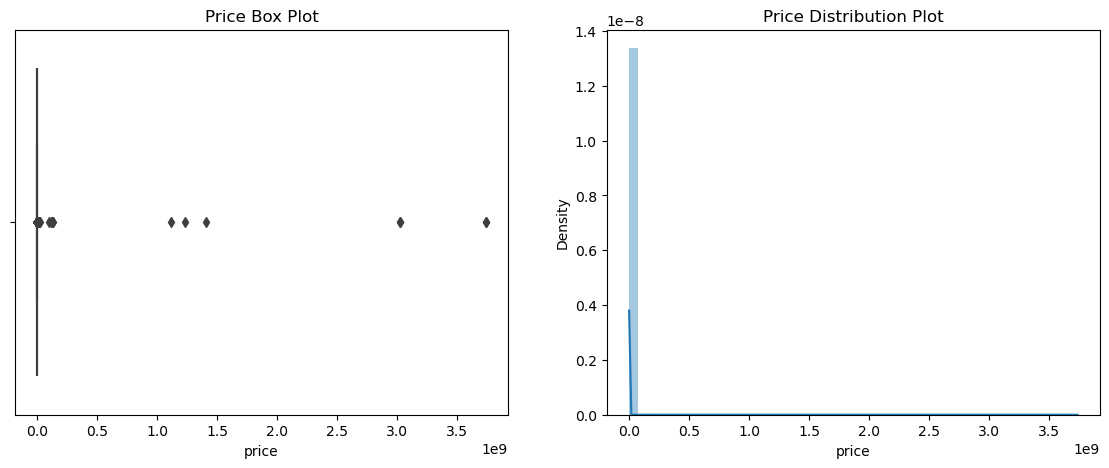

Metrics of: odometer
Max: 10000000.0
Min: 0.0
Mean: 103764.47842285798
Std. Dev.: 213173.9003117869


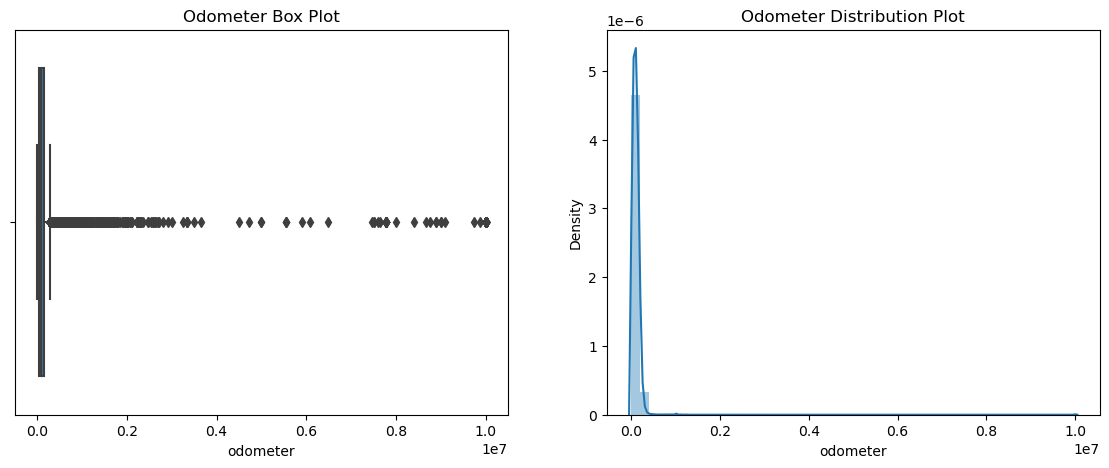

Metrics of: year
Max: 2022.0
Min: 1900.0
Mean: 2010.2051729413135
Std. Dev.: 10.205140242575116


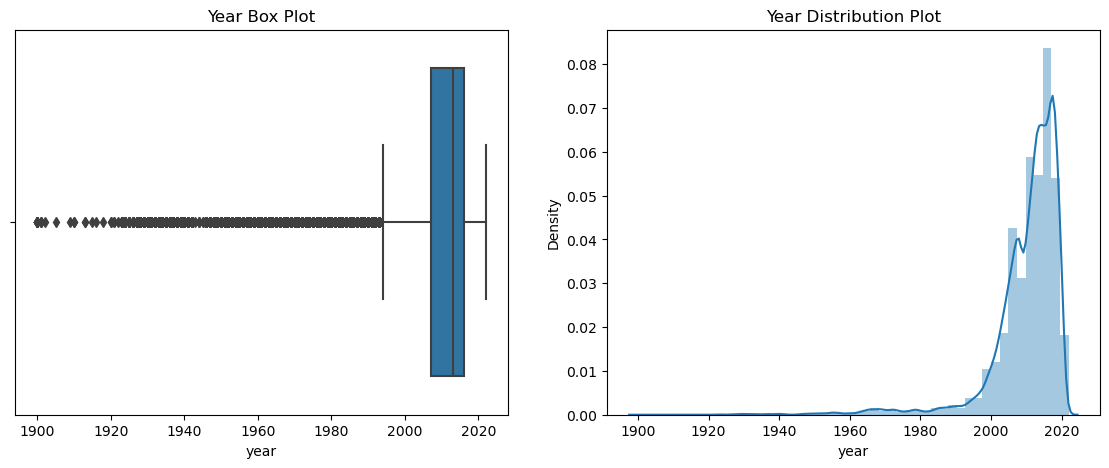

In [987]:
#Get the box plot and distribution plt for Price, Year and obometre 
import warnings
warnings.filterwarnings('ignore')
plot_num_col = ['price','odometer','year']
#box plot of 'price' to visualize outliers
for col in plot_num_col:
    plt.figure(figsize=(14,5))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=vehicle_clean,x=col).set(title=f'{col.capitalize()} Box Plot')

    plt.subplot(1, 2, 2)
    pd.option_context('mode.use_inf_as_na', True)
    sns.distplot(vehicle_clean[col]).set(title = f'{col.capitalize()} Distribution Plot')

    # plt.subplot(1, 3, 3)
    # plt.scatter(vehicle_clean[col],range(len(vehicle_clean)))#.set(title = f'{col.capitalize()} Scatter Plot')
    #sns.scatterplot(x=vehicle_clean[col], y=range(len(vehicle_clean[col]))).set(title = f'{col.capitalize()} Scatter Plot')
    
    #Max, min, mean and std for price
    print('Metrics of:',col)
    print('Max:', vehicle_clean[col].max())
    print('Min:', vehicle_clean[col].min())
    print('Mean:', vehicle_clean[col].mean())
    print('Std. Dev.:', vehicle_clean[col].std())
    plt.show()

### Outlier Detection
The numerical features visualization above for price, year and odometer suggests there are outliers which need to be analysed and handeled appropriately.

In [988]:
#Finding the outliers using summary statistic IQR method

def identify_outliers(df, feature):
    #Calculate IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    #Define Outlier Boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect Outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Identify outliers in each feature
outliers_price = identify_outliers(vehicle_clean, 'price')
outliers_year = identify_outliers(vehicle_clean, 'year')
outliers_odometer = identify_outliers(vehicle_clean, 'odometer')

print("Outliers in Price:\n", outliers_price)
print("Outliers in Year:\n", outliers_year)
print("Outliers in Odometer:\n", outliers_odometer)


Outliers in Price:


          price    year   manufacturer                   model condition  \
187      58977  2019.0            gmc             sierra 3500       NaN   
314      98900  2001.0        ferrari              360 modena      good   
331      72900  2021.0      chevrolet                   tahoe      good   
411      99950  2021.0      chevrolet  corvette stingray spor       NaN   
610     100000  1984.0           jeep                     cj7       NaN   
...        ...     ...            ...                     ...       ...   
279119   54995  2020.0  mercedes-benz               gle-class      good   
279122   65995  2020.0            gmc                  sierra      good   
279172   54999  2017.0           2017                    2017       NaN   
279174   54999  2017.0           2017                    2017       NaN   
279175   65999  2017.0           2017                    2017       NaN   

          cylinders    fuel  odometer title_status transmission drive  \
187             NaN     g

In [989]:
#removing outliers
def remove_outliers(df, feature):
    #Calculate IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    #Define Outlier Boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect Outliers
    df_no_outlier = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df_no_outlier

# Identify outliers in each feature

vehicle_clean = remove_outliers(vehicle_clean, 'price')
vehicle_clean = remove_outliers(vehicle_clean, 'year')
vehicle_clean = remove_outliers(vehicle_clean, 'odometer')

# print("Outliers in Price:\n", outliers_price)
# print("Outliers in Year:\n", outliers_year)
# print("Outliers in Odometer:\n", outliers_odometer)

In [990]:
print(vehicle_clean.shape)
vehicle_clean.columns

(251863, 15)


Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')

Metrics of: price
Max: 53845
Min: 1
Mean: 16552.74042237248
Std. Dev.: 12100.333847427702


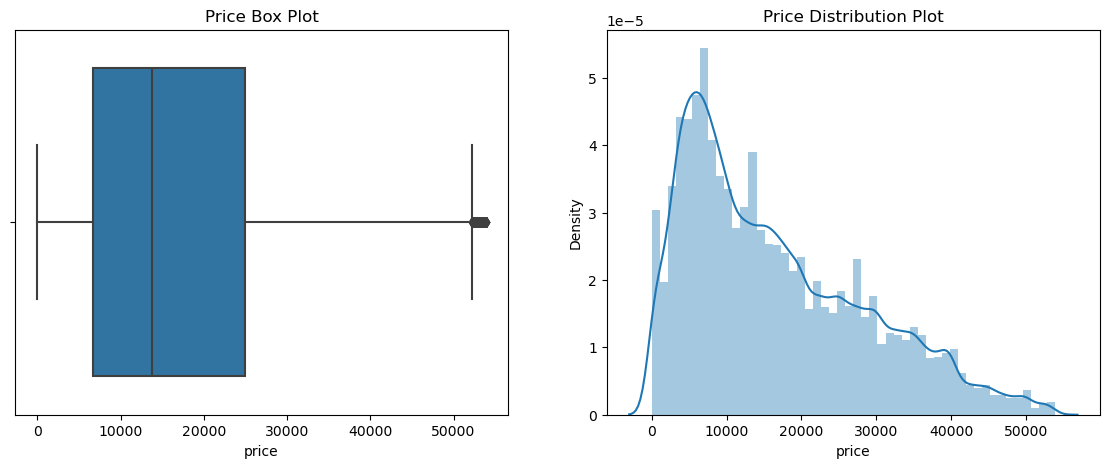

Metrics of: odometer
Max: 288638.0
Min: 0.0
Mean: 97418.44414622235
Std. Dev.: 61778.53367126606


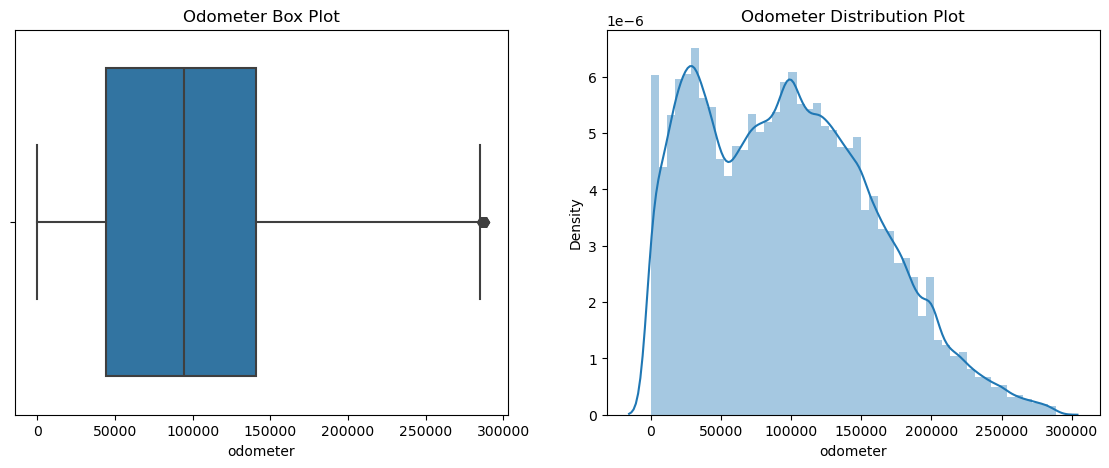

Metrics of: year
Max: 2022.0
Min: 1994.0
Mean: 2011.843740446195
Std. Dev.: 5.740379674446808


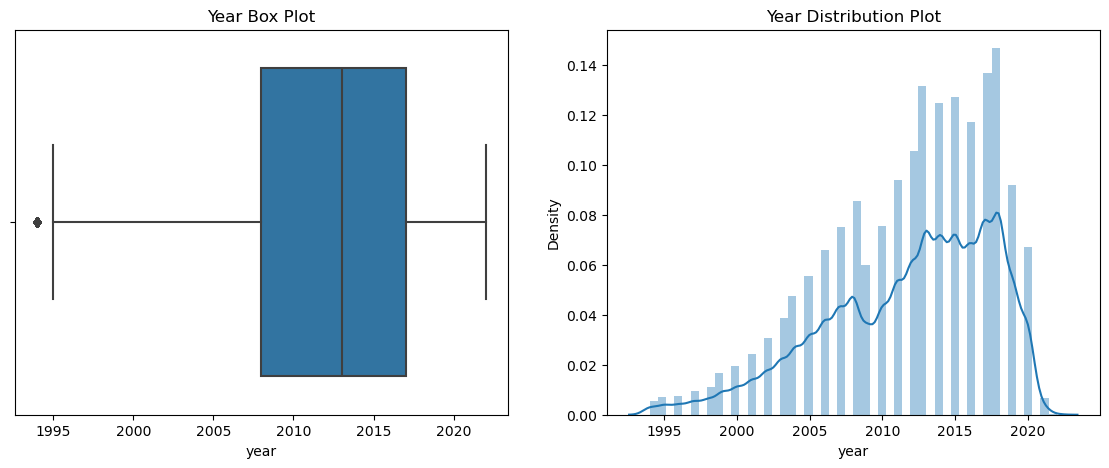

In [991]:
#After outliers are removed
#Get the box plot and distribution plt for Price, Year and obometre 
import warnings
warnings.filterwarnings('ignore')
plot_num_col = ['price','odometer','year']
#box plot of 'price' to visualize outliers
for col in plot_num_col:
    plt.figure(figsize=(14,5))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=vehicle_clean,x=col).set(title=f'{col.capitalize()} Box Plot')

    plt.subplot(1, 2, 2)
    pd.option_context('mode.use_inf_as_na', True)
    sns.distplot(vehicle_clean[col]).set(title = f'{col.capitalize()} Distribution Plot')
    
    #Max, min, mean and std for price
    print('Metrics of:',col)
    print('Max:', vehicle_clean[col].max())
    print('Min:', vehicle_clean[col].min())
    print('Mean:', vehicle_clean[col].mean())
    print('Std. Dev.:', vehicle_clean[col].std())
    plt.show()

In [992]:
#Plots looks much better and std is lower.

### Addressing NaN values - Heatmap visualization of nan/null values

In [993]:
#Empty column percentage
round(vehicle_clean.isna().sum()/vehicle_clean.shape[0]*100,2)

price            0.00
year             0.00
manufacturer     0.00
model            0.00
condition       35.54
cylinders       37.71
fuel             0.52
odometer         0.00
title_status     1.56
transmission     0.39
drive           28.90
size            68.19
type            21.82
paint_color     27.78
state            0.00
dtype: float64

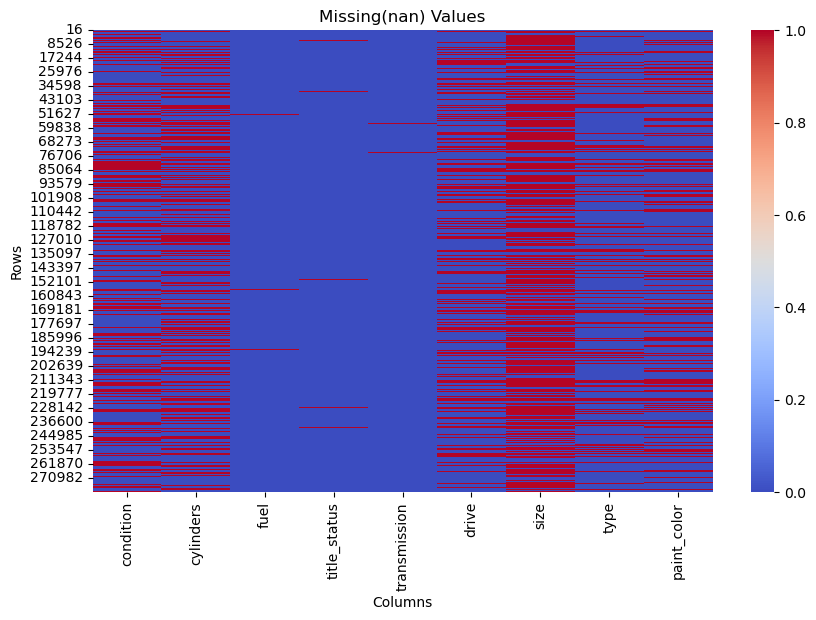

In [994]:
# Identify columns with missing values
nan_columns = vehicle_clean.columns[vehicle_clean.isnull().any()]

# Visualize missing data patterns using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(vehicle_clean[nan_columns].isnull(), cmap='coolwarm').set(title ='Missing(nan) Values',xlabel='Columns',ylabel='Rows')
plt.show()

In [995]:
vehicle_clean.isnull().sum()

price                0
year                 0
manufacturer         0
model                0
condition        89502
cylinders        94976
fuel              1301
odometer             0
title_status      3923
transmission       975
drive            72793
size            171738
type             54966
paint_color      69966
state                0
dtype: int64

In [996]:
# Group by manufacturer and model followed by filling NaN values
vehicle_clean_nonan = vehicle_clean.copy()
for col in nan_columns:
    vehicle_clean_nonan[col] = vehicle_clean_nonan.groupby(['manufacturer','model'])[col].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
    print('updated col:', col)


vehicle_clean_nonan.isnull().sum()

updated col: condition
updated col: cylinders
updated col: fuel
updated col: title_status
updated col: transmission
updated col: drive
updated col: size
updated col: type
updated col: paint_color


price               0
year                0
manufacturer        0
model               0
condition       10580
cylinders       20588
fuel              881
odometer            0
title_status     1607
transmission       56
drive           12417
size            47031
type             5310
paint_color      8342
state               0
dtype: int64

In [997]:
vehicle_clean_nonan[vehicle_clean_nonan['model']=='silverado 1500 crew']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
18,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,NaN,pickup,red,al
59,26990,2014.0,chevrolet,silverado 1500 crew,good,6 cylinders,gas,63129.0,clean,automatic,4wd,NaN,pickup,black,al
1539,39590,2019.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,21014.0,clean,other,4wd,NaN,pickup,brown,al
1560,36590,2019.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,7619.0,clean,other,4wd,NaN,pickup,white,al
2282,34990,2017.0,chevrolet,silverado 1500 crew,good,8 cylinders,other,30559.0,clean,other,4wd,NaN,pickup,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272265,24990,2011.0,chevrolet,silverado 1500 crew,good,8 cylinders,other,60030.0,clean,other,4wd,NaN,pickup,white,wi
275363,42590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,4135.0,clean,other,4wd,NaN,pickup,blue,wi
277069,39590,2019.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,21014.0,clean,other,4wd,NaN,pickup,white,wi
278299,26990,2014.0,chevrolet,silverado 1500 crew,good,6 cylinders,gas,63129.0,clean,automatic,4wd,NaN,pickup,black,wi


In [998]:
vehicle_clean_nonan.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
16,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,NaN,pickup,white,al
17,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,full-size,pickup,blue,al
18,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,NaN,pickup,red,al
19,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,full-size,pickup,red,al
20,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al


In [999]:
round(vehicle_clean_nonan.isna().sum()/vehicle_clean_nonan.shape[0]*100,2)

price            0.00
year             0.00
manufacturer     0.00
model            0.00
condition        4.20
cylinders        8.17
fuel             0.35
odometer         0.00
title_status     0.64
transmission     0.02
drive            4.93
size            18.67
type             2.11
paint_color      3.31
state            0.00
dtype: float64

In [1000]:
#Drop all dataset with NaN values
print(vehicle_clean_nonan.isnull().sum())

print(vehicle_clean_nonan[vehicle_clean_nonan.isnull().any(axis=1)].shape)
vehicle_clean_nonan.dropna(inplace=True)

# If you want to reset the index after dropping rows
vehicle_clean_nonan.reset_index(drop=True, inplace=True)
print(vehicle_clean_nonan.isnull().sum())
round(vehicle_clean_nonan.isna().sum()/vehicle_clean_nonan.shape[0]*100,2)


price               0
year                0
manufacturer        0
model               0
condition       10580
cylinders       20588
fuel              881
odometer            0
title_status     1607
transmission       56
drive           12417
size            47031
type             5310
paint_color      8342
state               0
dtype: int64
(48330, 15)


price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64


price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
size            0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

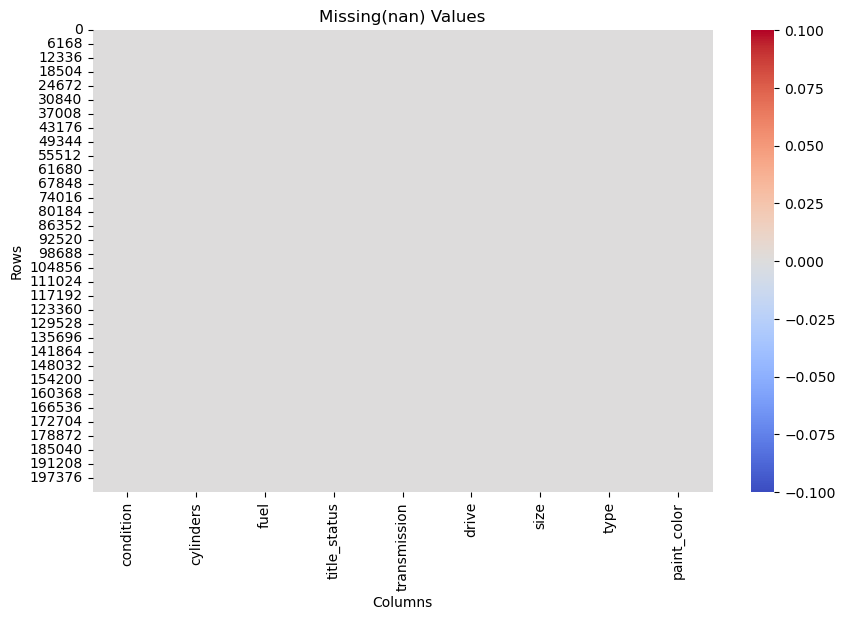

In [1001]:

# Visualize missing data patterns using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(vehicle_clean_nonan[nan_columns].isnull(), cmap='coolwarm').set(title ='Missing(nan) Values',xlabel='Columns',ylabel='Rows')
plt.show()

In [1002]:
# Data shape and columns after all cleanup
total_rows, total_col = vehicle_clean_nonan.shape
print("Total Rows : ",total_rows)
print("Total Columns : ",total_col)
print("List of Columns : ",vehicle_clean_nonan.columns)


Total Rows :  203533
Total Columns :  15
List of Columns :  Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')


### Continue with categorical data analysis after the numerical feature analysis.

In [1003]:
#Get the non-numeric or caterogical features
categorical_features = vehicle_clean_nonan.select_dtypes(include=['object']).columns.tolist()


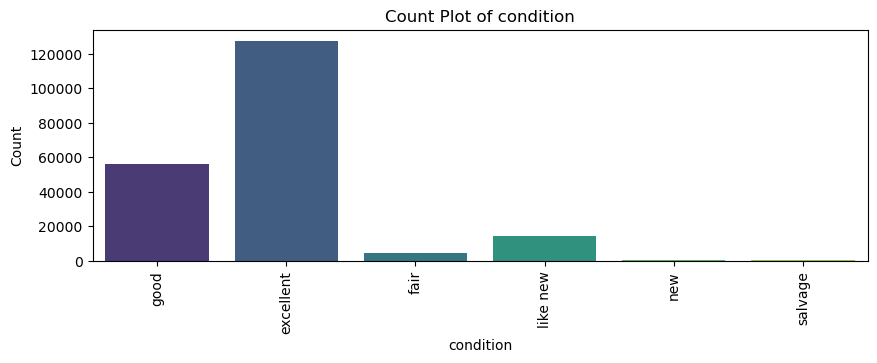

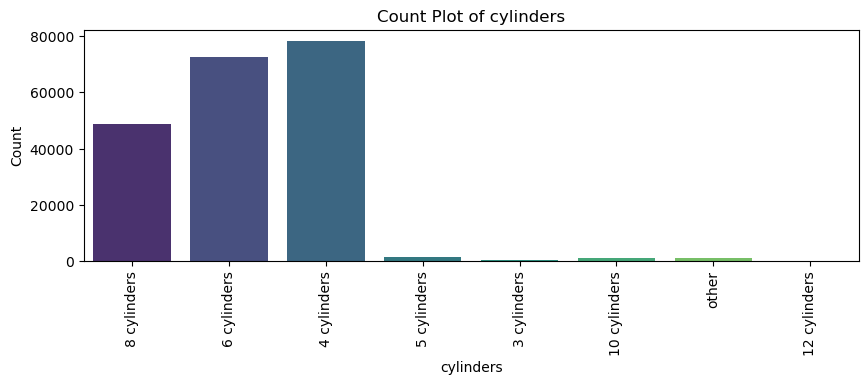

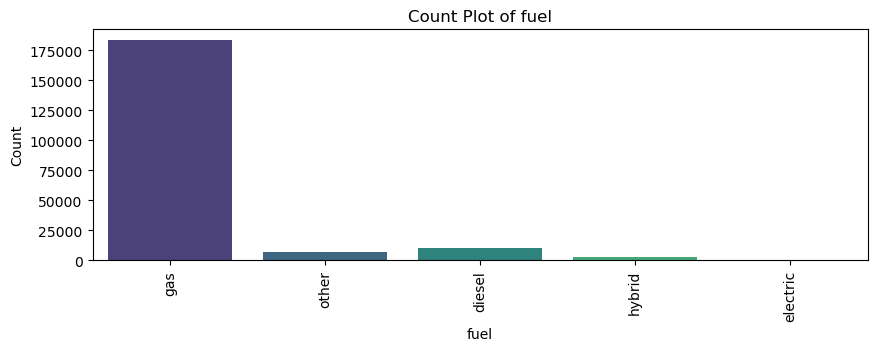

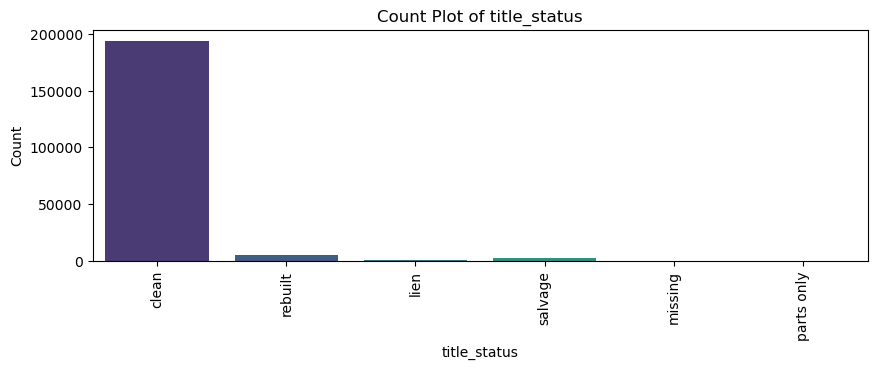

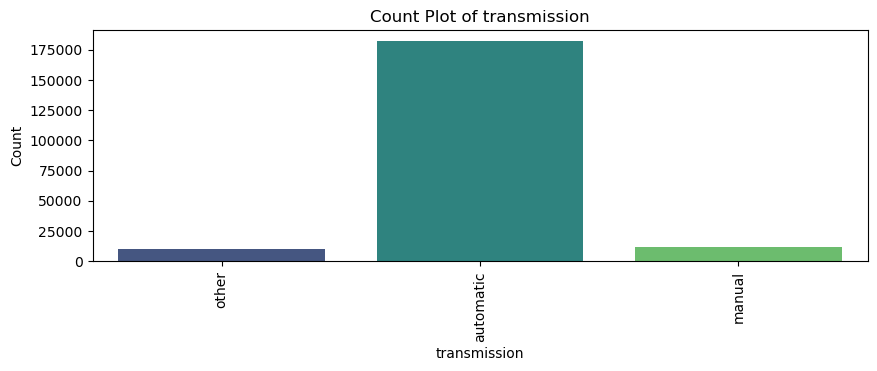

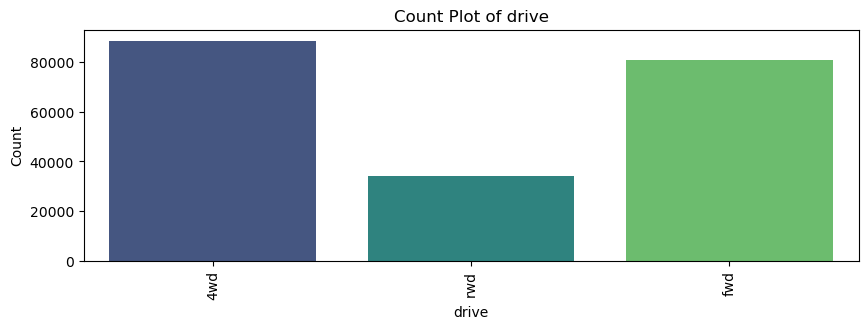

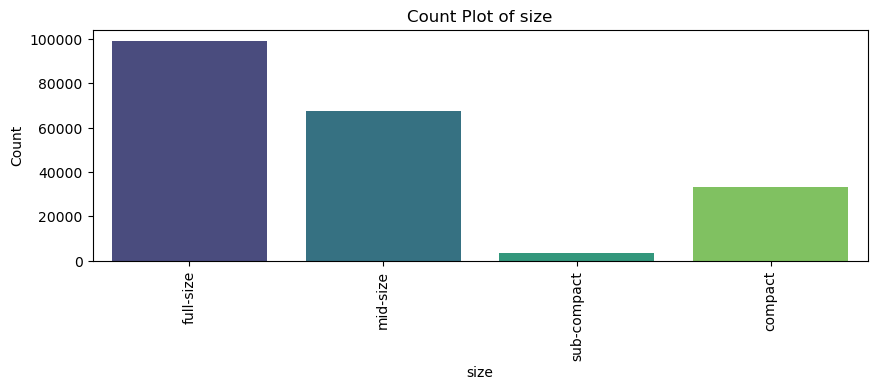

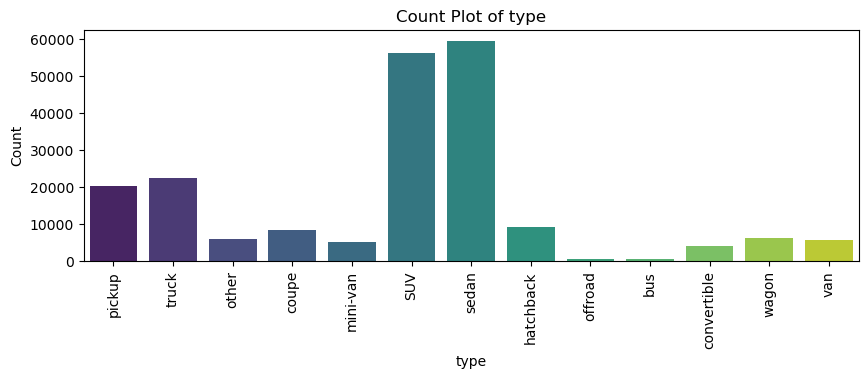

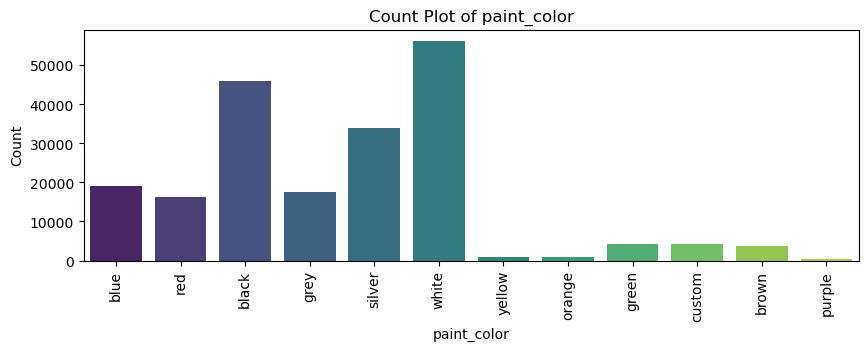

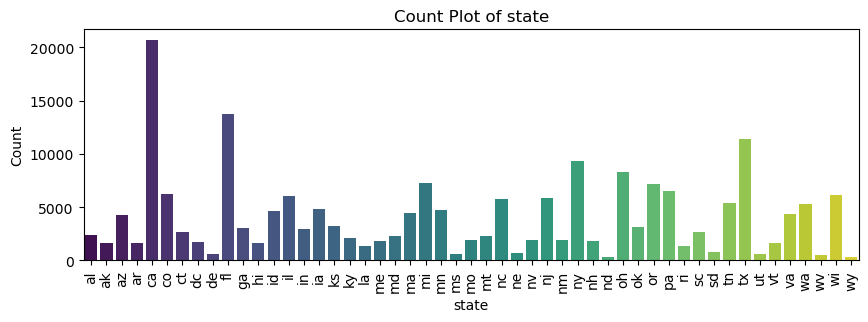

In [1004]:
#Count plot for all categorical columns skip manufacturere and model
skip = ['manufacturer','model'] #to many values to plot
for var in categorical_features:
    if var in skip:
        continue
    plt.figure(figsize=(10, 3))
    sns.countplot(data=vehicle_clean_nonan, x=var, palette='viridis')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {var}')
    plt.xticks(rotation=90)
    plt.show()

In [1005]:
#drop the state feature as it is not an important feature
vehicle_clean_nonan = vehicle_clean_nonan.drop(['state'],axis = 1)

Categorical features need to be encoded, depending on the number of different categories appropriate encoder to be chosen. Simple label encoder may work for may features but for model or manufacturer it may need too many labels. We'll use target encoding for 'model' and 'manufacturer', ordinal encoding for features with lesser number of uniqe values and for the remaing set one hot encoder. 

In [1006]:
#Year column is primarily dirving the age of the vehicle. Difference between current year and the vehicle year gives the age of the vehicle.
from datetime import datetime
print(vehicle_clean_nonan.shape)
present_yr = datetime.now().year
vehicle_clean_nonan['age'] = present_yr - vehicle_clean_nonan['year']
vehicle_clean_nonan=vehicle_clean_nonan.drop(['year'], axis = 1)
print(vehicle_clean_nonan.shape)




(203533, 14)
(203533, 14)


In [1007]:
vehicle_clean_nonan.columns


Index(['price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

In [1008]:
round(vehicle_clean_nonan.describe(),2)

,price,odometer,age
count,203533.00,203533.00,203533.00
mean,14621.42,106978.92,13.87
std,11237.76,59856.96,5.65
min,1.00,0.00,3.00
25%,5995.00,61000.00,9.00
50%,11491.00,104862.00,13.00
75%,20500.00,148000.00,18.00
max,53845.00,288638.00,31.00


In [1009]:
#Let's look at the correlation for the final dataset
vehicle_clean_nonan.corr(numeric_only=True)

,price,odometer,age
price,1.000000,-0.491133,-0.56389
odometer,-0.491133,1.000000,0.59581
age,-0.563890,0.595810,1.00000


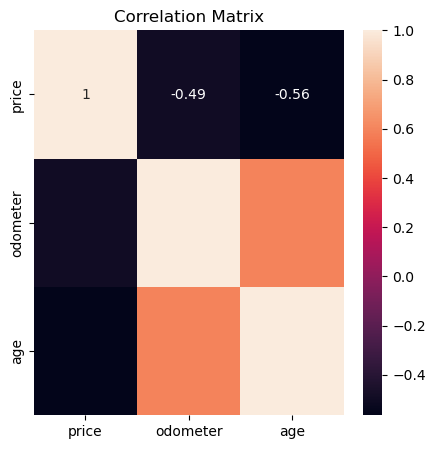

In [1010]:
plt.subplots(figsize=(5,5))
#create seaborn heatmap
sns.heatmap(vehicle_clean_nonan.corr(numeric_only=True), annot = True).set_title("Correlation Matrix")
plt.show()

#### Interprting the correlation matrix 
- Price to age negative correlation (-0.56) shows older vehicels will have lower the price.
- Price to odometer negative correlation (-0.49) shows similar behavoir more driven vehicles will have lower price
- Postive correlatoin between age and odometer suggests that generally newer vehicle have are less driven.

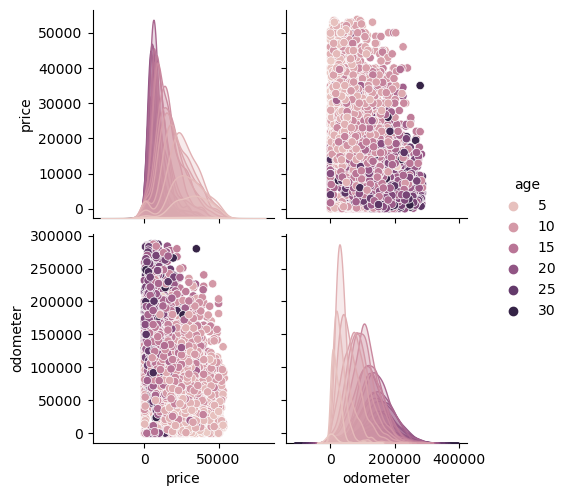

In [1011]:
#Perform a pairplot to check the correlation identified above
sample_1k_clean_vehicle = vehicle_clean_nonan.copy()
sample_1k_clean_vehicle = sample_1k_clean_vehicle.sample(n = 10000, random_state =1)

sns.pairplot(sample_1k_clean_vehicle, hue = 'age')

In [1012]:
vehicle_clean_encoded  = vehicle_clean_nonan.copy()
target_enc_features = ['model','manufacturer']
# target_enc_features = ['manufacturer']

# Initialize TargetEncoder
te = TargetEncoder(cols=target_enc_features)
vehicle_clean_encoded[['model_encoded','manufacturer_encoded']]=te.fit_transform(vehicle_clean_encoded[target_enc_features], vehicle_clean_encoded['price'])
print(vehicle_clean_encoded.columns)
vehicle_clean_encoded.head

Index(['price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age', 'model_encoded', 'manufacturer_encoded'],
      dtype='object')


<bound method NDFrame.head of         price   manufacturer                      model  condition  \
0       22590      chevrolet             silverado 1500       good   
1       30990         toyota       tundra double cab sr       good   
2       15000           ford                  f-150 xlt  excellent   
3       35000         toyota                     tacoma  excellent   
4       29990      chevrolet      colorado extended cab       good   
...       ...            ...                        ...        ...   
203528   7477           fiat                        500  excellent   
203529  29590         toyota  4runner sr5 sport utility       good   
203530  32590  mercedes-benz              c-class c 300       good   
203531  33590          lexus            gs 350 sedan 4d       good   
203532  23590         nissan          maxima s sedan 4d       good   

          cylinders fuel  odometer title_status transmission drive       size  \
0       8 cylinders  gas   71229.0        clean 

In [1013]:
#drop the orginal model and manufacturer columns
vehicle_clean_encoded.drop(['model','manufacturer'],axis=1,inplace=True)

# vehicle_clean_encoded.drop(['manufacturer'],axis=1,inplace=True)
vehicle_clean_encoded.columns

Index(['price', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'age',
       'model_encoded', 'manufacturer_encoded'],
      dtype='object')

In [1014]:
vehicle_clean_encoded['title_status'].unique()


array(['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'],
      dtype=object)

In [1015]:
# Columns to be target for ordinal encoding
ordinal_features = ['condition', 'cylinders', 'title_status', 'drive', 'size']
condition_categories = vehicle_clean_encoded['condition'].unique()
cylinders_categories = vehicle_clean_encoded['cylinders'].unique()
title_categories = vehicle_clean_encoded['title_status'].unique()
drive_categories = vehicle_clean_encoded['drive'].unique()
size_categories = vehicle_clean_encoded['size'].unique()

In [1016]:
vehicle_clean_encoded_ord = vehicle_clean_encoded.copy()
ordinal_transformers = [
    ('condition', OrdinalEncoder(categories=[condition_categories]), ['condition']),
    ('cylinders', OrdinalEncoder(categories=[cylinders_categories]), ['cylinders']),
    ('title_status', OrdinalEncoder(categories=[title_categories]), ['title_status']),
    ('drive', OrdinalEncoder(categories=[drive_categories]), ['drive']),
    ('size', OrdinalEncoder(categories=[size_categories]), ['size'])
]

# Create the ordinal encoding pipeline using ColumnTransformer
ordinal_pipeline = Pipeline(steps=[
    ('ordinal', ColumnTransformer(transformers=ordinal_transformers))
])

# Fit and transform on training data
vehicle_clean_encoded_ord = ordinal_pipeline.fit_transform(vehicle_clean_encoded_ord, vehicle_clean_encoded_ord['price'])
vehicle_clean_encoded_ord = pd.DataFrame(vehicle_clean_encoded_ord, columns=['condition_ord', 'cylinders_ord', 'title_status_ord', 'drive_ord', 'size_ord'])
vehicle_clean_encoded_ord.index = vehicle_clean_encoded_ord.index
vehicle_clean_encoded_ord = pd.concat([vehicle_clean_encoded, vehicle_clean_encoded_ord], axis=1).sort_index()


In [1017]:
vehicle_clean_encoded_ord

,price,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age,model_encoded,manufacturer_encoded,condition_ord,cylinders_ord,title_status_ord,drive_ord,size_ord
0,22590,good,8 cylinders,gas,71229.0,clean,other,4wd,full-size,pickup,blue,15.0,21853.860312,15982.234735,0.0,0.0,0.0,0.0,0.0
1,30990,good,8 cylinders,gas,41124.0,clean,other,4wd,full-size,pickup,red,8.0,34366.077824,14364.340886,0.0,0.0,0.0,0.0,0.0
2,15000,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,12.0,20497.162252,16720.199942,1.0,1.0,0.0,1.0,0.0
3,35000,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,mid-size,truck,grey,6.0,21281.669159,14364.340886,1.0,1.0,0.0,0.0,1.0
4,29990,good,6 cylinders,gas,17302.0,clean,other,4wd,mid-size,pickup,red,9.0,26028.320055,15982.234735,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203528,7477,excellent,4 cylinders,gas,64267.0,clean,manual,fwd,compact,hatchback,white,13.0,6809.270991,8808.157576,1.0,2.0,0.0,2.0,3.0
203529,29590,good,6 cylinders,gas,53475.0,clean,automatic,4wd,full-size,SUV,black,9.0,33394.349126,14364.340886,0.0,1.0,0.0,0.0,0.0
203530,32590,good,4 cylinders,gas,19059.0,clean,other,rwd,compact,sedan,white,5.0,27063.802521,16624.970832,0.0,2.0,0.0,1.0,3.0
203531,33590,good,6 cylinders,gas,30814.0,clean,automatic,rwd,mid-size,sedan,white,7.0,25424.060510,15613.082736,0.0,1.0,0.0,1.0,1.0


In [1018]:
#drop the original ornical encoded columns
print("Shape before droping 5 ordinal encoded columns : ",vehicle_clean_encoded_ord.shape)
vehicle_clean_encoded_ord.drop(['condition', 'cylinders', 'title_status', 'drive', 'size'],axis=1, inplace=True)
print("Shape after: ",vehicle_clean_encoded_ord.shape)

Shape before droping 5 ordinal encoded columns :  (203533, 19)
Shape after:  (203533, 14)


In [1019]:
ord_columns=['condition_ord', 'cylinders_ord', 'title_status_ord', 'drive_ord', 'size_ord']
for col in ord_columns:
    print(vehicle_clean_encoded_ord[col].value_counts())

condition_ord
1.0    127357
0.0     55855
3.0     14661
2.0      4554
4.0       695
5.0       411
Name: count, dtype: int64
cylinders_ord
2.0    78342
1.0    72593
0.0    48794
3.0     1512
6.0      924
5.0      887
4.0      408
7.0       73
Name: count, dtype: int64
title_status_ord
0.0    193847
1.0      5361
3.0      2869
2.0      1169
4.0       199
5.0        88
Name: count, dtype: int64
drive_ord
0.0    88705
2.0    80836
1.0    33992
Name: count, dtype: int64
size_ord
0.0    99016
1.0    67517
3.0    33428
2.0     3572
Name: count, dtype: int64


In [1020]:
vehicle_clean_encoded_ord['cylinders_ord'].unique()

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [1021]:
#One hot encoder on remain features
vehicle_clean_encoded_ohe = vehicle_clean_encoded_ord.copy()
ohe_features = ['fuel', 'transmission', 'type', 'paint_color']

one_hot_pipeline = Pipeline(steps=[
    ('onehot', ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(), ohe_features)
        ]
    ))
])

vehicle_clean_encoded_ohe = one_hot_pipeline.fit_transform(vehicle_clean_encoded_ohe[ohe_features],vehicle_clean_encoded_ohe['price'])
vehicle_clean_encoded_ohe
print(vehicle_clean_encoded_ohe.shape)



(203533, 33)


In [1022]:
vehicle_clean_encoded_ohe

<203533x33 sparse matrix of type '<class 'numpy.float64'>'
	with 814132 stored elements in Compressed Sparse Row format>

In [1023]:
ohe_feature_names = one_hot_pipeline.named_steps['onehot'].named_transformers_['onehot'].get_feature_names_out(ohe_features)
vehicle_clean_encoded_ohe = pd.DataFrame(vehicle_clean_encoded_ohe.toarray() if hasattr(vehicle_clean_encoded_ohe, "toarray") else vehicle_clean_encoded_ohe, columns=ohe_feature_names)


In [1024]:
vehicle_clean_encoded_ohe.head()

,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_automatic,transmission_manual,transmission_other,type_SUV,type_bus,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1025]:
vehicle_clean_encoded_final = pd.concat([vehicle_clean_encoded_ord, vehicle_clean_encoded_ohe], axis=1).sort_index()
print(vehicle_clean_encoded_final.shape)
vehicle_clean_encoded_final.drop(ohe_features,axis=1,inplace=True)#.sort_index()
print(vehicle_clean_encoded_final.shape)
vehicle_clean_encoded_final

(203533, 47)
(203533, 43)


,price,odometer,age,model_encoded,manufacturer_encoded,condition_ord,cylinders_ord,title_status_ord,drive_ord,size_ord,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,22590,71229.0,15.0,21853.860312,15982.234735,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30990,41124.0,8.0,34366.077824,14364.340886,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,15000,128000.0,12.0,20497.162252,16720.199942,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35000,43000.0,6.0,21281.669159,14364.340886,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29990,17302.0,9.0,26028.320055,15982.234735,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203528,7477,64267.0,13.0,6809.270991,8808.157576,1.0,2.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203529,29590,53475.0,9.0,33394.349126,14364.340886,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203530,32590,19059.0,5.0,27063.802521,16624.970832,0.0,2.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203531,33590,30814.0,7.0,25424.060510,15613.082736,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1026]:
vehicle_clean_encoded_final.shape

(203533, 43)

In [1027]:
#Standard Scaler and Polynomial Transformation
vehicle_clean_encoded_final_poly_df = vehicle_clean_encoded_final.copy()#.drop(['model_encoded'],axis=1).copy()
vehicle_clean_encoded_final_poly = vehicle_clean_encoded_final.copy()#.drop(['model_encoded'],axis=1).copy()

poly_features = ['odometer', 'age', 'model_encoded','manufacturer_encoded']


# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),           
    ('poly', PolynomialFeatures(degree=2, include_bias=False)) 
])

vehicle_clean_encoded_final_poly=pipeline.fit_transform(vehicle_clean_encoded_final_poly[poly_features], vehicle_clean_encoded_final_poly['price'])
vehicle_clean_encoded_final_poly

array([[-5.97257394e-01,  2.00188338e-01,  1.09246264e+00, ...,
         1.19347461e+00,  3.99996758e-01,  1.34060167e-01],
       [-1.10020768e+00, -1.03900740e+00,  3.00007796e+00, ...,
         9.00046774e+00, -2.22616800e-01,  5.50618491e-03],
       [ 3.51189403e-01, -3.30895551e-01,  8.85620165e-01, ...,
         7.84323076e-01,  5.02143084e-01,  3.21484455e-01],
       ...,
       [-1.46883742e+00, -1.57009129e+00,  1.88677152e+00, ...,
         3.55990679e+00,  1.02088917e+00,  2.92764605e-01],
       [-1.27245208e+00, -1.21603537e+00,  1.63677611e+00, ...,
         2.67903604e+00,  4.34841189e-01,  7.05801851e-02],
       [-1.24886245e+00, -1.39306333e+00,  6.21249354e-01, ...,
         3.85950760e-01, -5.91583557e-01,  9.06776567e-01]])

In [1028]:
poly_feature_names = pipeline.named_steps['poly'].get_feature_names_out(input_features=poly_features)
poly_feature_names

array(['odometer', 'age', 'model_encoded', 'manufacturer_encoded',
       'odometer^2', 'odometer age', 'odometer model_encoded',
       'odometer manufacturer_encoded', 'age^2', 'age model_encoded',
       'age manufacturer_encoded', 'model_encoded^2',
       'model_encoded manufacturer_encoded', 'manufacturer_encoded^2'],
      dtype=object)

In [1029]:
vehicle_clean_encoded_final_poly = pd.DataFrame(vehicle_clean_encoded_final_poly, columns=poly_feature_names)


In [1030]:
vehicle_clean_encoded_final_poly.head()

,odometer,age,model_encoded,manufacturer_encoded,odometer^2,odometer age,odometer model_encoded,odometer manufacturer_encoded,age^2,age model_encoded,age manufacturer_encoded,model_encoded^2,model_encoded manufacturer_encoded,manufacturer_encoded^2
0,-0.597257,0.200188,1.092463,0.366142,0.356716,-0.119564,-0.652481,-0.218681,0.040075,0.218698,0.073297,1.193475,0.399997,0.134060
1,-1.100208,-1.039007,3.000078,-0.074204,1.210457,1.143124,-3.300709,0.081639,1.079536,-3.117103,0.077098,9.000468,-0.222617,0.005506
2,0.351189,-0.330896,0.885620,0.566996,0.123334,-0.116207,0.311020,0.199123,0.109492,-0.293048,-0.187616,0.784323,0.502143,0.321484
3,-1.068866,-1.393063,1.005226,-0.074204,1.142475,1.488998,-1.074452,0.079314,1.940625,-1.400344,0.103370,1.010480,-0.074591,0.005506
4,-1.498191,-0.861979,1.728902,0.366142,2.244576,1.291410,-2.590225,-0.548551,0.743009,-1.490278,-0.315607,2.989101,0.633024,0.134060


In [1031]:
vehicle_clean_encoded_final_poly = pd.concat([vehicle_clean_encoded_final_poly_df.drop(poly_features,axis=1), vehicle_clean_encoded_final_poly], axis=1).sort_index()
vehicle_clean_encoded_final_poly

,price,condition_ord,cylinders_ord,title_status_ord,drive_ord,size_ord,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,...,odometer^2,odometer age,odometer model_encoded,odometer manufacturer_encoded,age^2,age model_encoded,age manufacturer_encoded,model_encoded^2,model_encoded manufacturer_encoded,manufacturer_encoded^2
0,22590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.356716,-0.119564,-0.652481,-0.218681,0.040075,0.218698,0.073297,1.193475,0.399997,0.134060
1,30990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.210457,1.143124,-3.300709,0.081639,1.079536,-3.117103,0.077098,9.000468,-0.222617,0.005506
2,15000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.123334,-0.116207,0.311020,0.199123,0.109492,-0.293048,-0.187616,0.784323,0.502143,0.321484
3,35000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.142475,1.488998,-1.074452,0.079314,1.940625,-1.400344,0.103370,1.010480,-0.074591,0.005506
4,29990,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.244576,1.291410,-2.590225,-0.548551,0.743009,-1.490278,-0.315607,2.989101,0.633024,0.134060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203528,7477,1.0,2.0,0.0,2.0,3.0,0.0,0.0,1.0,0.0,...,0.509180,0.109795,0.857166,1.132035,0.023675,0.184832,0.244102,1.442974,1.905697,2.516802
203529,29590,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.798995,0.770493,-2.549239,0.066328,0.743009,-2.458303,0.063962,8.133493,-0.211624,0.005506
203530,32590,0.0,2.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,...,2.157483,2.306209,-2.771361,-0.794755,2.465187,-2.962404,-0.849541,3.559907,1.020889,0.292765
203531,33590,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.619134,1.547347,-2.082719,-0.338051,1.478742,-1.990378,-0.323063,2.679036,0.434841,0.070580


In [1033]:
vehicle_clean_encoded_final_poly.columns

Index(['price', 'condition_ord', 'cylinders_ord', 'title_status_ord',
       'drive_ord', 'size_ord', 'fuel_diesel', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'fuel_other', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'type_SUV', 'type_bus',
       'type_convertible', 'type_coupe', 'type_hatchback', 'type_mini-van',
       'type_offroad', 'type_other', 'type_pickup', 'type_sedan', 'type_truck',
       'type_van', 'type_wagon', 'paint_color_black', 'paint_color_blue',
       'paint_color_brown', 'paint_color_custom', 'paint_color_green',
       'paint_color_grey', 'paint_color_orange', 'paint_color_purple',
       'paint_color_red', 'paint_color_silver', 'paint_color_white',
       'paint_color_yellow', 'odometer', 'age', 'model_encoded',
       'manufacturer_encoded', 'odometer^2', 'odometer age',
       'odometer model_encoded', 'odometer manufacturer_encoded', 'age^2',
       'age model_encoded', 'age manufacturer_encoded', 'model_encoded^2',

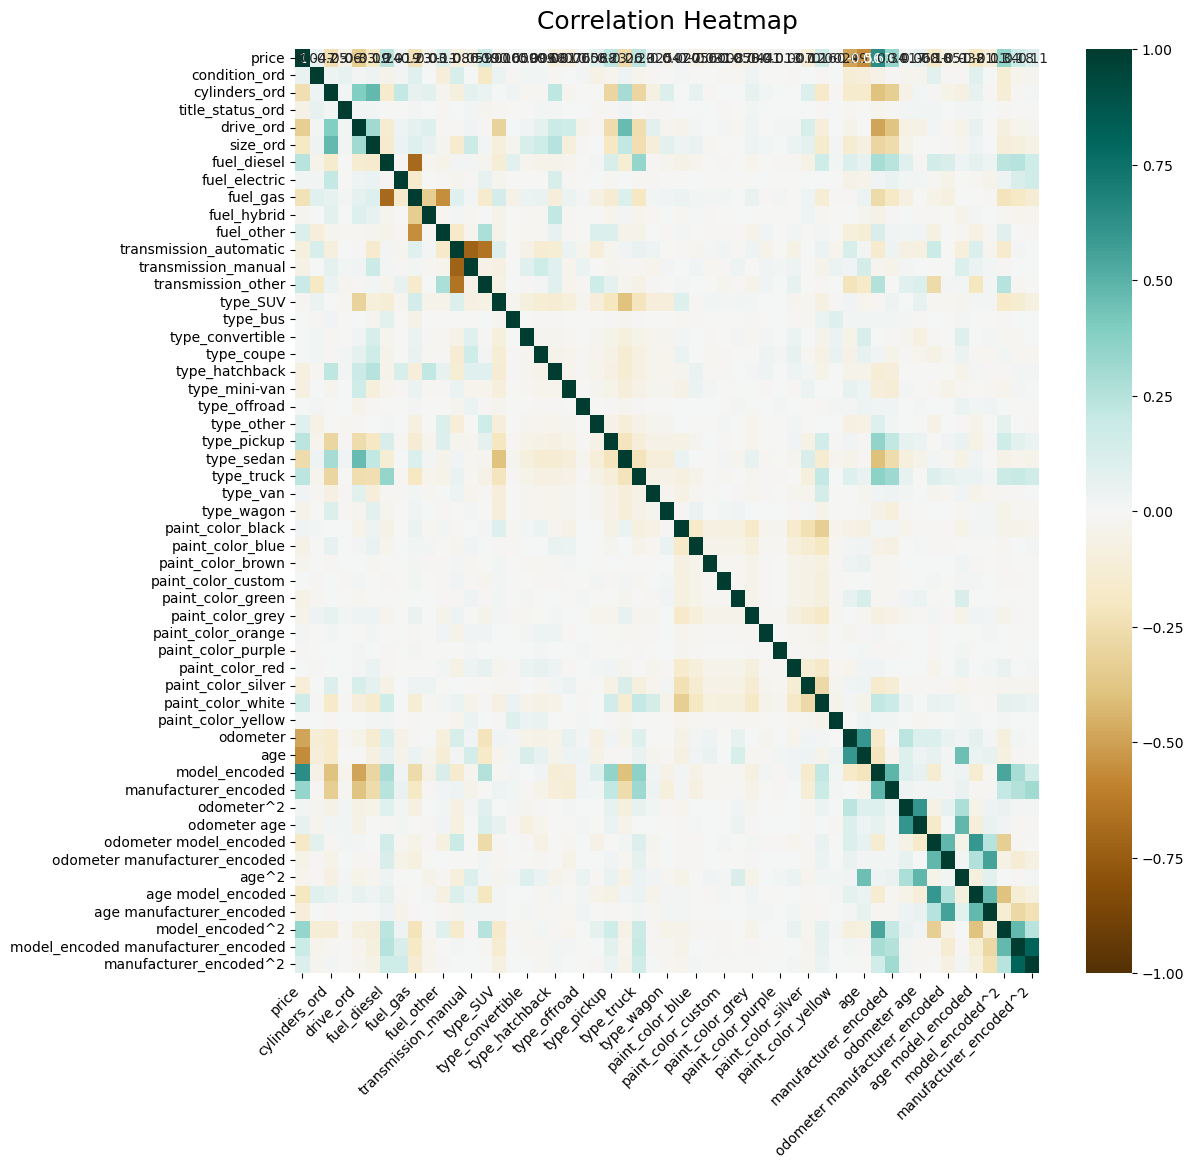

In [1034]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(vehicle_clean_encoded_final_poly.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=15)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()


In [1035]:
#From above correlation Diesle vehicles have better pricing,

In [1036]:
vehicle_clean_encoded_final_poly.columns

Index(['price', 'condition_ord', 'cylinders_ord', 'title_status_ord',
       'drive_ord', 'size_ord', 'fuel_diesel', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'fuel_other', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'type_SUV', 'type_bus',
       'type_convertible', 'type_coupe', 'type_hatchback', 'type_mini-van',
       'type_offroad', 'type_other', 'type_pickup', 'type_sedan', 'type_truck',
       'type_van', 'type_wagon', 'paint_color_black', 'paint_color_blue',
       'paint_color_brown', 'paint_color_custom', 'paint_color_green',
       'paint_color_grey', 'paint_color_orange', 'paint_color_purple',
       'paint_color_red', 'paint_color_silver', 'paint_color_white',
       'paint_color_yellow', 'odometer', 'age', 'model_encoded',
       'manufacturer_encoded', 'odometer^2', 'odometer age',
       'odometer model_encoded', 'odometer manufacturer_encoded', 'age^2',
       'age model_encoded', 'age manufacturer_encoded', 'model_encoded^2',

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [1037]:
#prepare 70/30 traingin and test set
X = vehicle_clean_encoded_final_poly.drop(columns=['price',])
y = vehicle_clean_encoded_final_poly['price']
print(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

        condition_ord  cylinders_ord  title_status_ord  drive_ord  size_ord  \
0                 0.0            0.0               0.0        0.0       0.0   
1                 0.0            0.0               0.0        0.0       0.0   
2                 1.0            1.0               0.0        1.0       0.0   
3                 1.0            1.0               0.0        0.0       1.0   
4                 0.0            1.0               0.0        0.0       1.0   
...               ...            ...               ...        ...       ...   
203528            1.0            2.0               0.0        2.0       3.0   
203529            0.0            1.0               0.0        0.0       0.0   
203530            0.0            2.0               0.0        1.0       3.0   
203531            0.0            1.0               0.0        1.0       1.0   
203532            0.0            1.0               0.0        2.0       0.0   

        fuel_diesel  fuel_electric  fuel_gas  fuel_

,condition_ord,cylinders_ord,title_status_ord,drive_ord,size_ord,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,odometer^2,odometer age,odometer model_encoded,odometer manufacturer_encoded,age^2,age model_encoded,age manufacturer_encoded,model_encoded^2,model_encoded manufacturer_encoded,manufacturer_encoded^2
106997,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.090643,0.166866,-0.318736,-0.022340,0.307187,-0.586767,-0.041127,1.120802,0.078558,0.005506
74586,3.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.465096,2.465141,0.009448,-0.890219,2.465187,0.009448,-0.890235,0.000036,-0.003412,0.321484
119725,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.784639,2.372682,0.221373,0.993180,7.174790,0.669412,3.003292,0.062457,0.280209,1.257146
127356,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.073330,-0.293901,-0.258919,-0.153540,1.177937,1.037729,0.615377,0.914210,0.542129,0.321484
60667,0.0,2.0,0.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.338693,0.219530,-0.878093,-0.315676,0.142292,-0.569151,-0.204611,2.276535,0.818417,0.294222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.046352,-0.004986,-0.016679,-0.093282,0.000536,0.001794,0.010035,0.006002,0.033565,0.187725
103694,0.0,2.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.219151,0.176588,-0.185634,0.202830,0.142292,-0.149581,0.163437,0.157244,-0.171810,0.187725
131932,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.005011,-0.010892,0.033178,0.000362,0.023675,-0.072118,-0.000786,0.219684,0.002394,0.000026
146867,1.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.877972,1.139427,-0.529737,-0.343076,1.478742,-0.687490,-0.445242,0.319625,0.207000,0.134060


In [1038]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142473, 52)
(61060, 52)
(142473,)
(61060,)


In [1039]:
#Initialize multile models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

In [1040]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")


Linear Regression: RMSE = 6036.1497, R2 = 0.7105
Ridge Regression: RMSE = 6036.1477, R2 = 0.7105
Lasso Regression: RMSE = 6036.1869, R2 = 0.7105


As per the regression analysis above the best performance is for the Linear regression model. Though there is not much difference but the Linear regression perfomed better than others.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Cross Validation and Hyperparameter Tuning


In [1041]:
#Linear regression
model = LinearRegression()
name = 'LinearRegression'
# For Linear Regression, just perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")
print()
print('Evaluate the best models on the test set')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

LinearRegression: Cross-validation RMSE = 6068.6658

Evaluate the best models on the test set
LinearRegression: RMSE = 6036.1497, R2 = 0.7105


In [1042]:
#Ridge regression
param_grid = {'alpha': [0.01,0.1, 1.0, 10.0, 100.0,1000.0]}
model = Ridge()
name = 'Ridge'

grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
best_models[name] = grid.best_estimator_
best_rmse = np.sqrt(-grid.best_score_)
print(f"Ridge : {grid.best_params_}, RMSE = {best_rmse:.4f}")
print()
print('Evaluate the best models on the test set')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Ridge : {'alpha': 10.0}, RMSE = 6068.7236

Evaluate the best models on the test set
Ridge: RMSE = 6036.1477, R2 = 0.7105


In [1043]:
#Lasso Regression
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
models = Lasso()
name ='Lasso'

grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
best_models[name] = grid.best_estimator_
best_rmse = np.sqrt(-grid.best_score_)
print(f"Lasso : {grid.best_params_}, RMSE = {best_rmse:.4f}")
print()
print('Evaluate the best models on the test set')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Lasso : {'alpha': 10.0}, RMSE = 6068.7236

Evaluate the best models on the test set
Lasso: RMSE = 6036.1477, R2 = 0.7105


1. LinearRegression: Cross-validation RMSE = 6068.6658

- Evaluate the best models on the test set
- LinearRegression: RMSE = 6036.1497, R2 = 0.7105

2. Ridge : {'alpha': 10.0}, RMSE = 6068.7236

- Evaluate the best models on the test set
- Ridge: RMSE = 6036.1477, R2 = 0.7105


3. Lasso : {'alpha': 10.0}, RMSE = 6068.7236

- Evaluate the best models on the test set
- Lasso: RMSE = 6036.1477, R2 = 0.7105

In [1060]:
#Best model after hyperparameter tunning is still Linear regression
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
coeff = []
scores = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model.fit(X_train_fold, y_train_fold)
    coeff.append(model.coef_)
    scores.append(model.score(X_test_fold, y_test_fold))

coeff_df = pd.DataFrame(coeff, columns=X_train.columns)
coeff_mean = coeff_df.mean()
coeff_std = coeff_df.std()

print("Coefficients mean:\n",coeff_mean)
print("\nCoefficients std:",coeff_std)

# Evaluate scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print()
print("Mean CVS:", round(mean_score,4))
print("STD CVS:", round(std_score,4))

Coefficients mean:
 condition_ord                          155.122636
cylinders_ord                        -1323.299640
title_status_ord                     -1236.686128
drive_ord                             -978.419707
size_ord                              -527.933420
fuel_diesel                           5508.077450
fuel_electric                           88.896845
fuel_gas                             -2208.546640
fuel_hybrid                          -1117.743301
fuel_other                           -2270.684354
transmission_automatic                 125.619462
transmission_manual                   1432.751364
transmission_other                   -1558.370826
type_SUV                             -1211.235861
type_bus                                31.731955
type_convertible                      2790.075593
type_coupe                             584.459183
type_hatchback                       -1490.344262
type_mini-van                         -990.441050
type_offroad                  

In [1045]:
y_pred_n = model.predict(X_test)


In [1046]:
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_n})
round(actual_vs_predicted_df.head(),1)

,Actual,Predicted
160257,6995,9012.5
198207,25989,27751.2
98036,4800,5344.2
10617,43990,22678.6
197509,8999,10736.0


In [1047]:
model.coef_


array([  149.76784769, -1314.63927343, -1254.85385201,  -976.682766  ,
        -523.46428556,  5562.97363921,  -168.21199003, -2107.30433826,
       -1095.49013663, -2191.96717429,   107.35116787,  1447.14130361,
       -1554.49247149, -1242.94571867,   163.61540662,  2700.07003397,
         543.23912552, -1495.39959432, -1029.73326005,  2258.97841211,
         207.43461949,   740.47475265, -1414.33540627,  1154.21099928,
       -1032.15824453, -1553.45112581,  -198.19748978,  -304.31050629,
         103.11280344,   743.77886906,   -79.12254928,   -63.61222857,
        -404.24380774,   -57.28131605,  -203.44726253,  -106.80679077,
        -248.23632676,   818.36660528, -2448.30319241, -5268.31465279,
        3148.53081871,   390.90766923,     7.42442545,   250.16797453,
        -621.08548489,   -41.43923884,   997.13062827,  -909.51824977,
        -370.84782113,  -199.97689754,   581.92974383,  -274.87474504])

In [1048]:
model.intercept_


18711.66842050537

In [1049]:
model.feature_names_in_


array(['condition_ord', 'cylinders_ord', 'title_status_ord', 'drive_ord',
       'size_ord', 'fuel_diesel', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'fuel_other', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'type_SUV',
       'type_bus', 'type_convertible', 'type_coupe', 'type_hatchback',
       'type_mini-van', 'type_offroad', 'type_other', 'type_pickup',
       'type_sedan', 'type_truck', 'type_van', 'type_wagon',
       'paint_color_black', 'paint_color_blue', 'paint_color_brown',
       'paint_color_custom', 'paint_color_green', 'paint_color_grey',
       'paint_color_orange', 'paint_color_purple', 'paint_color_red',
       'paint_color_silver', 'paint_color_white', 'paint_color_yellow',
       'odometer', 'age', 'model_encoded', 'manufacturer_encoded',
       'odometer^2', 'odometer age', 'odometer model_encoded',
       'odometer manufacturer_encoded', 'age^2', 'age model_encoded',
       'age manufacturer_encoded', 'model_encoded^2',
 

In [1050]:
model_coef = pd.DataFrame({
    'Feature': model.feature_names_in_,
    'Coef': model.coef_
})
model_coef.sort_values(by='Coef', ascending=False)

,Feature,Coef
5,fuel_diesel,5562.973639
40,model_encoded,3148.530819
15,type_convertible,2700.070034
19,type_offroad,2258.978412
11,transmission_manual,1447.141304
23,type_truck,1154.210999
46,age^2,997.130628
37,paint_color_yellow,818.366605
29,paint_color_custom,743.778869
21,type_pickup,740.474753


        Actual       Predict
160257    6995   9020.501593
198207   25989  27746.155591
98036     4800   5338.996338
10617    43990  22677.783060
197509    8999  10736.332237


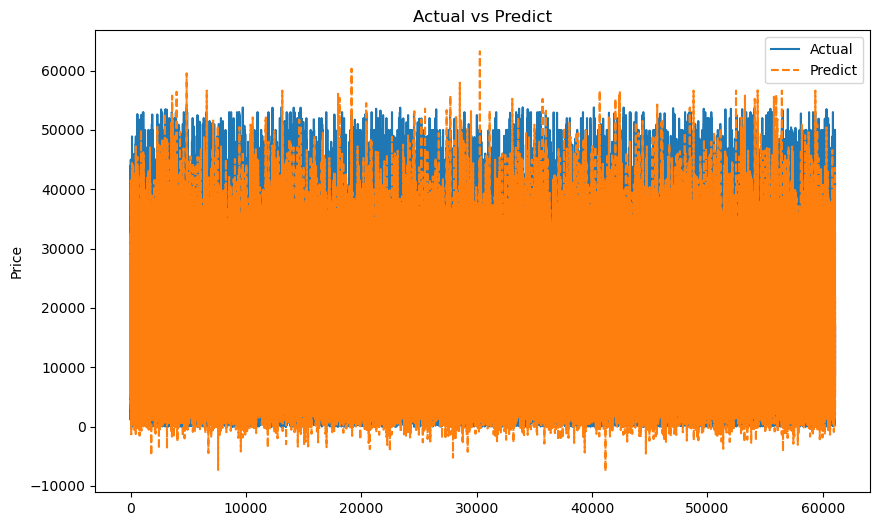

In [1061]:

# actual vs predicted values comparision
comparison_df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
print(comparison_df.head())

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values, label='Actual')
plt.plot(comparison_df['Predict'].values, label='Predict', linestyle='--')
plt.ylabel('Price')
plt.title('Actual vs Predict')
plt.legend()
plt.show()


In [1052]:
#Interpret the Model - Permutation Importance

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
feature_names = X_test.columns.tolist()
mean_importance = perm_importance.importances_mean
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': mean_importance}).set_index('Feature')
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.sort_values(by='Importance', ascending=False)

,Importance
Feature,
age,4.406648e-01
model_encoded,1.586447e-01
odometer,9.420864e-02
age^2,2.811549e-02
cylinders_ord,2.341432e-02
fuel_diesel,2.303632e-02
age model_encoded,1.282551e-02
drive_ord,1.281799e-02
model_encoded manufacturer_encoded,9.600363e-03


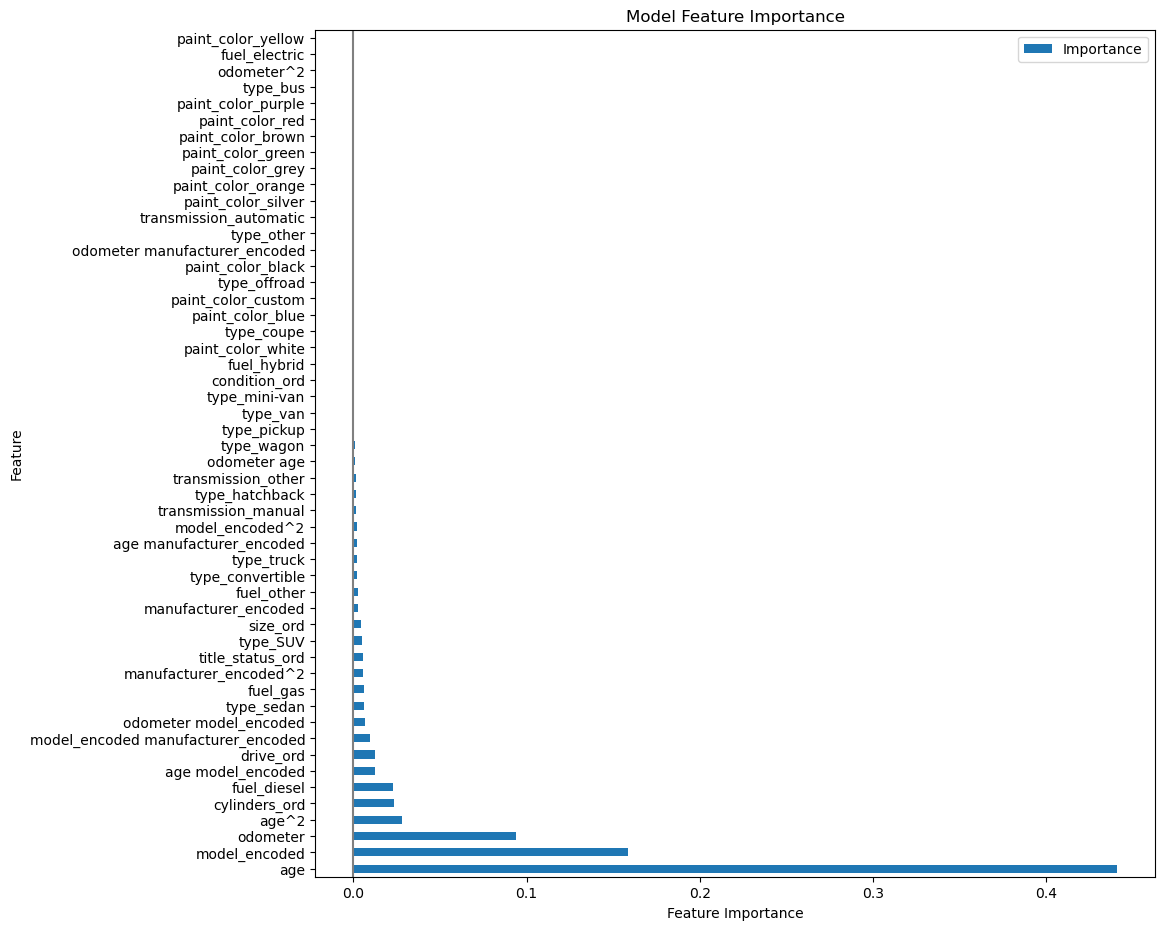

In [1053]:
#Plot Feature importance
# importance_df = importance_df.
importance_df.plot.barh(figsize=(14, 11))
plt.title("Model Feature Importance")
plt.axvline(x=0, color=".5")
plt.xlabel("Feature Importance")
plt.subplots_adjust(left=0.3)

- Many features  like paint or type doesn't have much impact on the price of the car, hence can be ignored in future models.
- Reintroduced featires like age to improve the model performance.

In [1064]:
# drop negative importance columns and verify the model again
X_train_new = X_train.drop(columns=['odometer^2','type_bus','fuel_electric','paint_color_yellow'])
X_test_new = X_test.drop(columns=['odometer^2','type_bus','fuel_electric','paint_color_yellow'])


In [1065]:
X_train_new.shape


(142473, 48)

In [1066]:
# models training and evaluation linear regression : did not observe much difference

model.fit(X_train_new, y_train)
y_pred_new = model.predict(X_test_new)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_new))
r2 = r2_score(y_test, y_pred_new)
print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Lasso: RMSE = 6036.1226, R2 = 0.7105


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.


Based on the data analysis and model evaluations , we understand now which features influence the descision of the customer most. Using this dealrship can optimize their process and improve the sales.

1. Age of the vehicle has the most significant impact. Newer model sells for highest prices. Maintain such inventory will help with the profit increase.
2. How much has the car been driven. In this case lesser the better.
3. Number of cylinders has positive impact, i.e. more the number of cylider or bigger the engine higher the price.
4. Diesel cars sold for higer price than any other fuel type.